In [1]:
#Here it starts, the heroic path of data hygiene. 

#Might be interesting to check who reports the shark attacks and when, so we could wonder where is the void in reports.
#The data may show that sharks only attack on english spoken territory.
#If data is accurate enough, it could be funny to search at what time does sharks set their tables.
#Might more attacks could be reported a couple years after Jaws was premiered? 1975 is the year.

#SEEMINGLY RELEVANT COLUMNS:
#Tier1: Country, Date, Time, Year 
#Tier2: Name, Area, Location, Activity

#Crucial facts:
#-In 2008 a polar bear jaw was found in a Greenland shark's stomach.
#-This is Mary Lee, the influencer shark: https://twitter.com/maryleeshark

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Hokusai level shark graphics.
import pylab as plt
import seaborn as sns

#This make the graph possible
%matplotlib inline

#Functions
from src.funk import Funk 

In [3]:
#Load fishy data from attacks.csv

tibu = pd.read_csv('attacks.csv', encoding= "ISO-8859-1")

In [4]:
tear1 = tibu[['Date', 'Year', 'Country','Time']]
tear2 = tibu[['Name', 'Area', 'Location', 'Activity']]
tears = tibu[['Date', 'Year', 'Country','Time', 'Name', 'Area', 'Location', 'Activity']]

In [5]:
# Null values in columns. Remember that the important ones are as follow:
#Tier1: Country, Date, Time, Year 
#Tier2: Name, Area, Location, Activity
#Originally, the file has 25723 rows

#Irrelevant, as it comes, this file is mainly null values. Let's check it by row. But let's drop duplicates first.

'N nan cols: 14'

Case Number                0.016700
Year                       0.033400
Type                       0.066800
Country                    0.584502
Area                       6.312625
Location                   7.615230
Activity                   8.099532
Age                       42.551770
Injury                     0.334001
Fatal (Y/N)                8.600534
Time                      51.169005
Species                   43.353373
Investigator or Source     0.250501
href formula               0.016700
dtype: float64

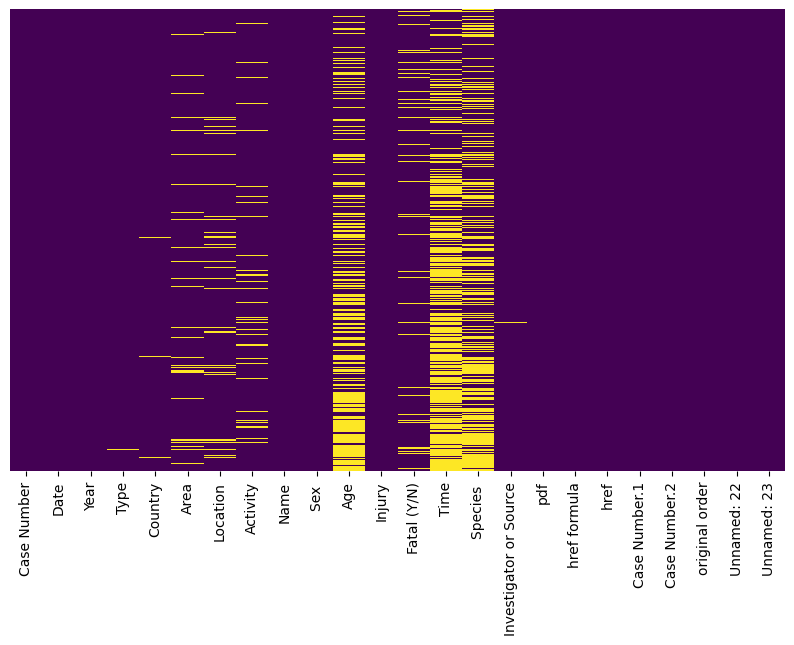

In [24]:
Funk.check_nan(tibu)

In [7]:
#Dropping all rows where Tear1 columns are null. Before (6312, 24), then (6302, 24)
tibu.drop(tibu[(tibu.Country.isna() == 1) & (tibu.Date.isna() == 1) 
                                           & (tibu.Time.isna() == 1)
                                           & (tibu.Year.isna() == 1)].index, axis=0, inplace=True)

In [8]:
#tibu['Country'].unique()

In [9]:
#tibu.describe(include='all').T

In [10]:
tibu[(tibu.Country.isna() == 1) & (tibu.Area.isna() == 1) 
                                           & (tibu.Location.isna() == 1)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,NaN,NaN
525,2014.08.00,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0,NaN,NaN
3378,1970.11.00,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0,NaN,NaN
3388,1970.07.05,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0,NaN,NaN
3395,1970.04.00.b,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0,NaN,NaN
3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0,NaN,NaN
3425,1969.08.00,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0,NaN,NaN
3661,1964.09.27,27-Sep-1964,1964.0,Invalid,NaN,NaN,NaN,Spearfishing,Giancarlo Griffon,M,24,"Disappeared, probable drowning but sharks in a...",NaN,11h00,Shark involvement prior to death was not confi...,C. Moore. GSAF,1964.09.27-Griffon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1964.09.27,1964.09.27,2642.0,NaN,NaN
4726,1942.00.00.e,1942,1942.0,Sea Disaster,NaN,NaN,NaN,Jumped overboard from torpedoed Panamanian fre...,male,M,NaN,FATAL,Y,NaN,NaN,"V.M. Coppleson (1962), p.258",1942.00.00.e-seaman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.00.00.e,1942.00.00.e,1577.0,NaN,NaN
4729,1942.00.00.b,1942,1942.0,Boating,NaN,NaN,NaN,"Days before the surrender of Singapore, the 3 ...","Bombardier J. Hall, Private Green of the Sherw...",M,NaN,No injury to occupants. Sharks continually fol...,N,NaN,NaN,"V.M. Coppleson (1962), p.206",1942.00.00.b-Hall-Green-Jennings.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.00.00.b,1942.00.00.b,1574.0,NaN,NaN


In [11]:
tibu.sort_values(by='Year', ascending=True).head(30)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
6209,ND.0110,"No date, late 1960s",0.0,Unprovoked,VENEZUELA,Los Roques Islands,NaN,Spearfishing,4 French divers,M,NaN,"FATAL (x3), one survived with minor injuries",Y,NaN,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,ND-0110-FrenchDivers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0110,ND.0110,94.0,NaN,NaN
6210,ND-0109,Before 2006,0.0,Unprovoked,USA,Florida,"Tampa Bay, Hillsborough County",Wade-fishing,Ed Snyder,M,NaN,"No injury, shark rammed his back",N,NaN,NaN,Fishingworld.com,ND-0109-Ed-Snyder.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0109,ND-0109,93.0,NaN,NaN
6211,ND-0108,Before 2003,0.0,Unprovoked,GREECE,Dodecanese Islands,Near Symi Island,Free diving for sponges,male,M,NaN,FATAL,Y,NaN,NaN,M. Kalafatas,ND-0108-SpongeDiver-Symi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0108,ND-0108,92.0,NaN,NaN
6212,ND-0107,Before 2004,0.0,Boat,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",NaN,NaN,"No injury to occupants, shark bumped boat",N,NaN,Whale shark,South African Shark Attack File,ND-0107-Inhambane.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0107,ND-0107,91.0,NaN,NaN
6213,ND-0106,Before 1962,0.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Murray Bay, Robben Island",Swimming,"male, a mental patient",M,NaN,"FATAL, body not recovered",Y,NaN,NaN,"L.Green, A Decent Fellow doesn't Work, p.225",ND-0106-MentalPatient.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0106,ND-0106,90.0,NaN,NaN
6214,ND.0104,1950s,0.0,Unprovoked,AUSTRALIA,Torres Strait,NaN,Helmet diving,male,M,NaN,"No injury, helmet bitten",N,NaN,Tiger shark,"A. Seekee & R. Callinan, Courier-Mail, 7/7/199...",ND-0104-HelmetDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0104,ND.0104,89.0,NaN,NaN
6215,ND.0102,"No date, Before 1963",0.0,Unprovoked,BAHREIN,NaN,NaN,Pearl diving,male,M,NaN,FATAL,Y,NaN,Tiger shark,A.C. Doyle,ND-0102-Bahrein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0102,ND.0102,88.0,NaN,NaN
6216,ND.0100,2003?,0.0,Unprovoked,BAHAMAS,Andros Islands,Great Guana Cay,Spearfishing,C.D. Dollar,M,NaN,Swim fin bitten,N,NaN,1.8 m [6'] shark,"R.D. Weeks, GSAF",ND-0100-CDDollar.pdf,Q93http://sharkattackfile.net/spreadsheets/pdf...,Q93http://sharkattackfile.net/spreadsheets/pdf...,ND.0100,ND.0100,87.0,NaN,NaN
6217,ND.0097,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,N,NaN,NaN,Internet,ND-0097-PaulMenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0097,ND.0097,86.0,NaN,NaN


In [12]:
deceroa1860 = tibu[(tibu.Year >= 0) & (tibu.Year < 1860)]
#There are 125 rows in year 0
#There are 44 row from 0 to 1800
#Since the oldest dated records seem to be less precise, I'll drop the 5% oldest ones.
tibu.drop(deceroa1860.index, axis=0, inplace=True)

In [13]:
stats = tibu.describe().T

stats['IQR'] = stats['75%'] - stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
Year,5986.0,1971.957401,39.216159,1860.0,1950.00,1982.0,2006.00,2018.0,56.0
original order,5988.0,3309.219439,1729.116866,178.0,1812.75,3309.5,4806.25,6303.0,2993.5


In [14]:
tibu.Year.value_counts().tail(39)

1925.0    14
1878.0    13
1908.0    13
1900.0    13
1893.0    13
1883.0    13
1887.0    13
1882.0    12
1874.0    12
1862.0    12
1896.0    12
1915.0    12
1921.0    12
1892.0    11
1897.0    11
1917.0    11
1863.0    11
1903.0    10
1889.0     9
1891.0     9
1876.0     9
1871.0     9
1901.0     9
1881.0     9
1885.0     9
1870.0     8
1872.0     8
1879.0     8
1860.0     7
1884.0     7
1868.0     6
1867.0     5
1918.0     5
1875.0     5
1861.0     5
1865.0     4
1873.0     4
1869.0     2
1866.0     2
Name: Year, dtype: int64

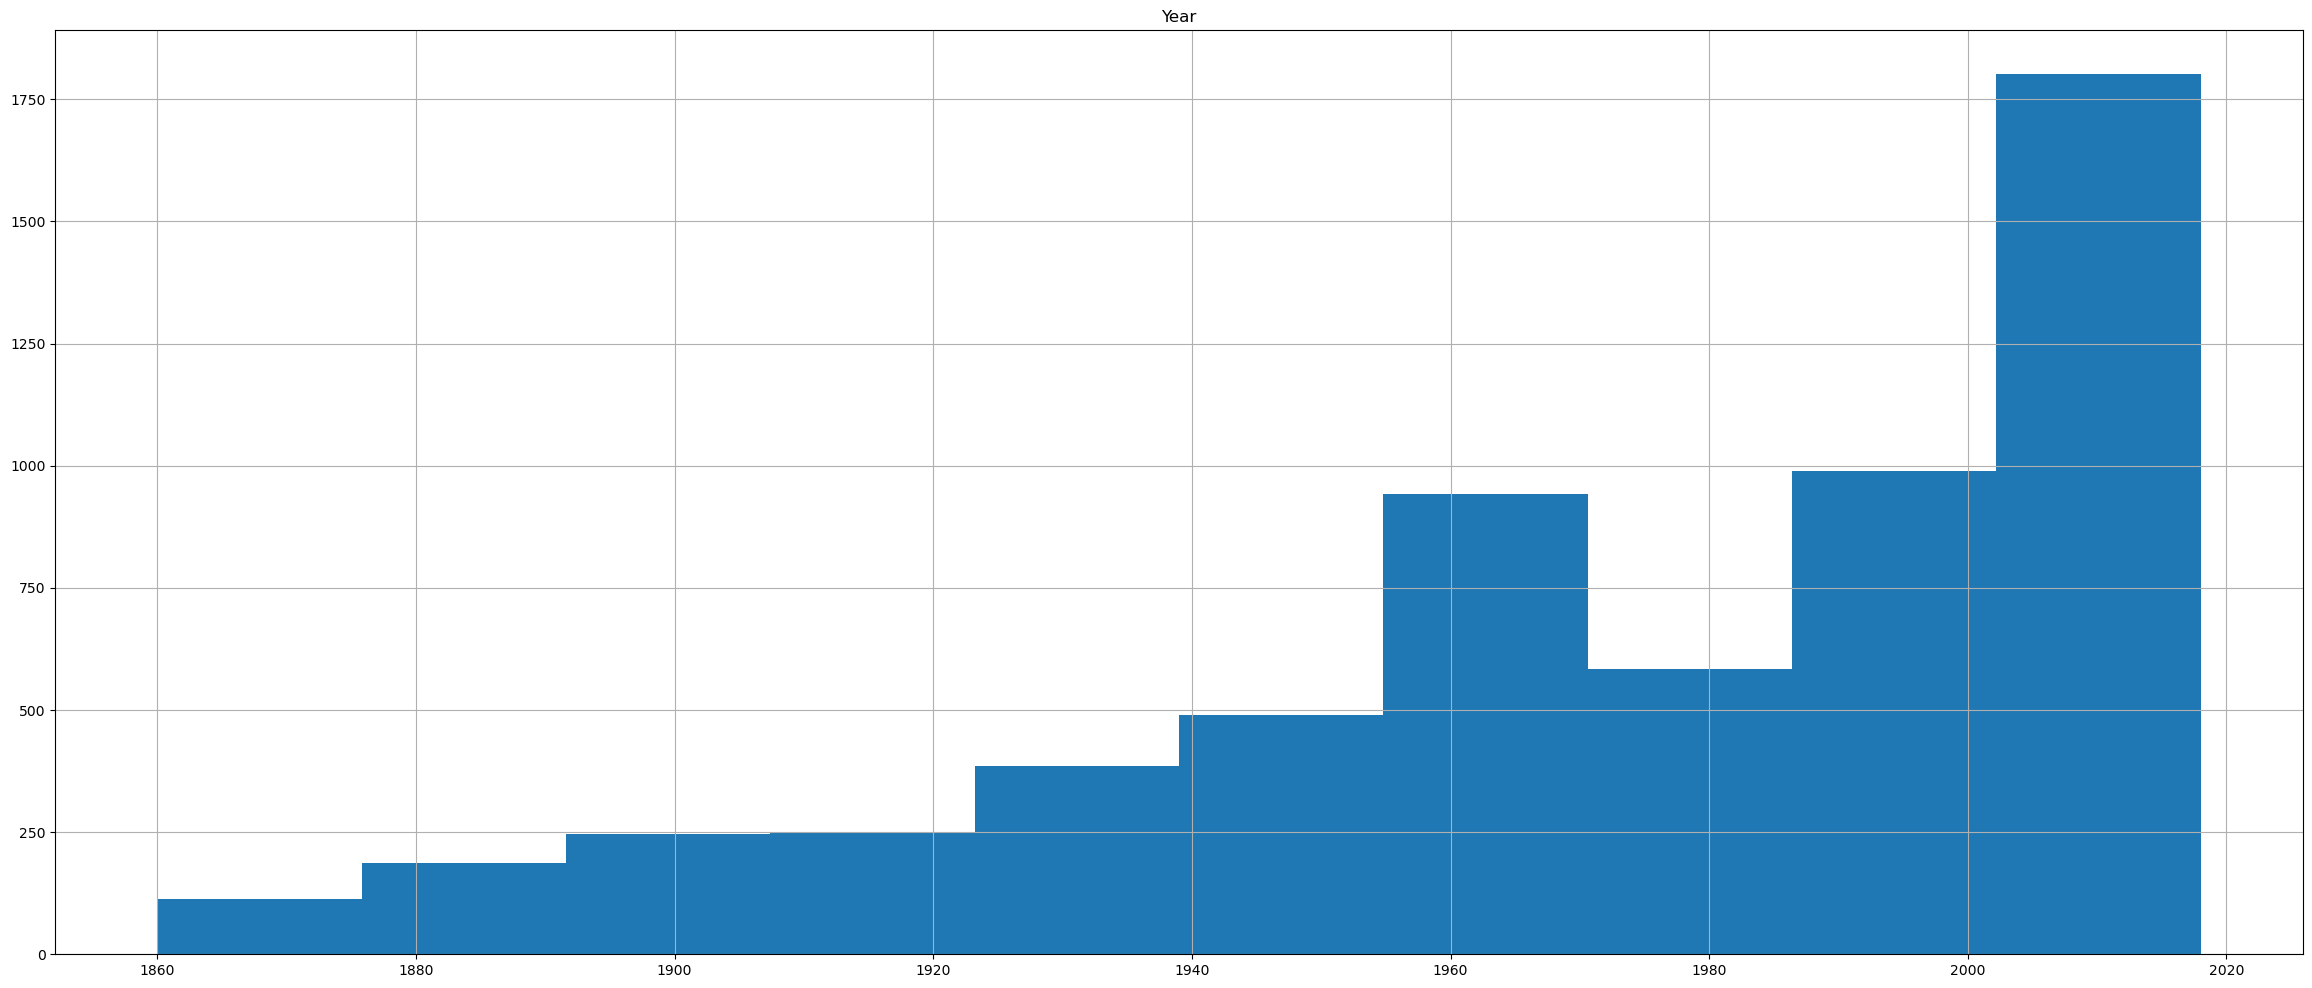

In [27]:
tibu[['Year']].hist(figsize=(29, 12));

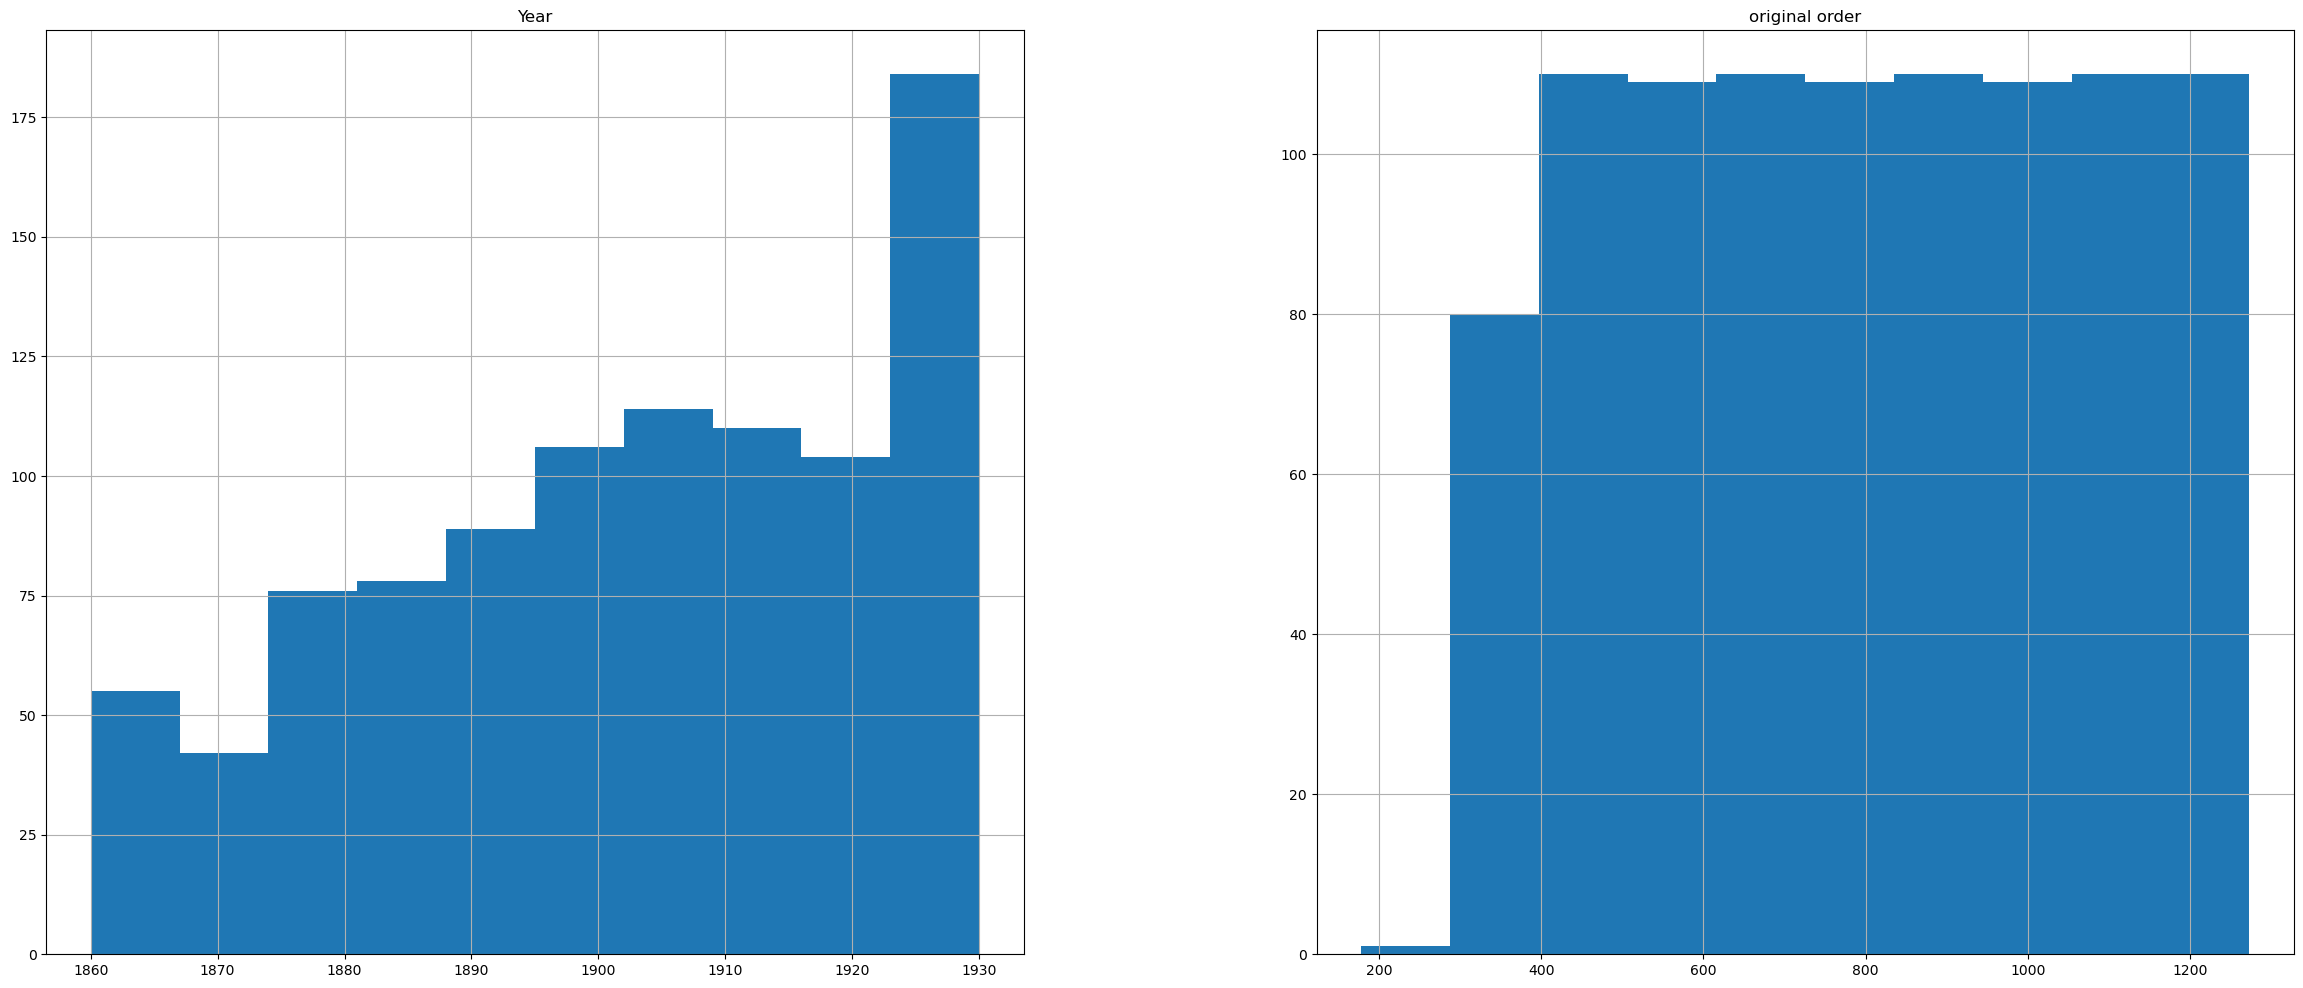

In [29]:
de1860a1930 = tibu[(tibu.Year < 1931)]

de1860a1930.hist(figsize=(29, 12));

In [16]:
#HYGIENE STEPS:

#Clean fully the Year column
#Clean the Country column, if empty fill it with Area if not with Location. Unknown for null Area and Location.
#Name and Sex will be unknown
#Unnamed columns will be filled with seawater

In [17]:
tibu['Unnamed: 22'].fillna('Seawater', inplace=True)
tibu['Unnamed: 23'].fillna('Seawater', inplace=True)
tibu['Name'].fillna('Unknown', inplace=True)
tibu['Sex '].fillna('Unknown', inplace=True)

In [18]:
#for searching nan values data.cylinders.iloc[[21506]]
#tibu.loc[(tibu.Date.isna() == 1)]
#tibu[['Country', 'Date', 'Time', 'Year']].head(40)

In [19]:

bad_index = tibu.Country[tibu.Country.isna()].index

tibu.iloc[bad_index]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,Seawater,Seawater
525,2014.08.00,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0,Seawater,Seawater
2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0,Seawater,Seawater
3378,1970.11.00,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0,Seawater,Seawater
3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,Unknown,Unknown,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,Seawater,Seawater
3388,1970.07.05,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0,Seawater,Seawater
3395,1970.04.00.b,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0,Seawater,Seawater
3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0,Seawater,Seawater
3425,1969.08.00,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0,Seawater,Seawater
3605,1965.10.21,21-Oct-1965,1965.0,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0,Seawater,Seawater


In [20]:
#Originally, the dataframe had (25723, 24) rows, after dropping duplicates it has (6312, 24).
#Originally, the dataframe used 22.8MB, after dropping duplicates and changing datatype it uses 7.0MB.
tibu = tibu.drop_duplicates()
for c in tibu.select_dtypes('object'):
    
    tibu[c]=tibu[c].astype('category')
    
for c in tibu.select_dtypes('float'):
    
    tibu[c]=pd.to_numeric(tibu[c], downcast='float')
    
tibu.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5988 entries, 0 to 6125
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Case Number             5987 non-null   category
 1   Date                    5988 non-null   category
 2   Year                    5986 non-null   float32 
 3   Type                    5984 non-null   category
 4   Country                 5953 non-null   category
 5   Area                    5610 non-null   category
 6   Location                5532 non-null   category
 7   Activity                5503 non-null   category
 8   Name                    5988 non-null   category
 9   Sex                     5988 non-null   category
 10  Age                     3440 non-null   category
 11  Injury                  5968 non-null   category
 12  Fatal (Y/N)             5473 non-null   category
 13  Time                    2924 non-null   category
 14  Species                 

In [21]:
tibu.reset_index(drop=True, inplace=True)

In [22]:
tibu.to_csv('mar_de_caca.csv', index=False)

In [23]:
tibu.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5988 entries, 0 to 5987
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Case Number             5987 non-null   category
 1   Date                    5988 non-null   category
 2   Year                    5986 non-null   float32 
 3   Type                    5984 non-null   category
 4   Country                 5953 non-null   category
 5   Area                    5610 non-null   category
 6   Location                5532 non-null   category
 7   Activity                5503 non-null   category
 8   Name                    5988 non-null   category
 9   Sex                     5988 non-null   category
 10  Age                     3440 non-null   category
 11  Injury                  5968 non-null   category
 12  Fatal (Y/N)             5473 non-null   category
 13  Time                    2924 non-null   category
 14  Species                 